# Indentifying Interactions with Random Forest
<br>
A collection of tools and techniques for learning about how a random forest makes predictions. 

In [131]:
#imports
import numpy as np
import pandas as pd
import random
import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier

## Generate data

In [185]:
#functions
def generate_row():
    """
    Generate one random employee for the dataset
    """
    
    experience = random.randint(0,40)
    degree = int(random.random() < 0.75)
    performance = round(random.random()*10,2)
    sales = random.randint(0,100)
    
    return {'experience':experience, 
            'degree':degree, 
            'performance':performance,
            'sales':sales}

def score_row(employee,a=0,b=20,c=5,d=2,e=1/5,f=1/5):
    """
    Score an employee based on employee data
    """
    score = 0
    
    score+=a*employee['experience']
    score+=b*employee['degree']
    score+=c*employee['experience']*employee['degree']
    score+= d*employee['performance']
    score+= e*employee['sales']
    score+= f*employee['sales']*employee['performance']
        
    score += random.randint(0,20)    
    
    return round(score)


employee=generate_row()
print(employee)
score_row(employee)

{'experience': 40, 'degree': 1, 'performance': 3.4, 'sales': 70}


293

In [190]:
data_dics = []
for i in range(1000):
    random_employee = generate_row()
    score = score_row(random_employee)
    random_employee['bonus'] = score
    
    promotion = int(score > 180)
    random_employee['promotion'] = promotion 
    
    data_dics.append(random_employee)
    
data  = pd.DataFrame(data_dics,columns=['experience', 'degree','performance', 'sales', 'bonus', 'promotion']) 

In [4]:
#data.to_csv('../data/interaction_dataset.csv',index=False)

In [187]:
data = pd.read_csv('../data/interaction_dataset.csv')
data.head()

,experience,degree,performance,sales,bonus,promotion
0,9,1,7.92,14,113,0
1,35,1,4.12,13,231,0
2,40,1,5.89,38,293,1
3,16,0,3.24,76,90,0
4,20,1,2.99,60,185,0


## Explore Data

In [192]:
data.describe()

,experience,degree,performance,sales,bonus,promotion
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,20.158000,0.746000,4.977220,50.58100,171.268000,0.456000
std,11.931026,0.435515,2.875656,28.80773,91.163024,0.498309
min,0.000000,0.000000,0.010000,0.00000,8.000000,0.000000
25%,10.000000,0.000000,2.595000,26.00000,101.000000,0.000000
50%,20.000000,1.000000,4.895000,50.00000,163.000000,0.000000
75%,31.000000,1.000000,7.390000,76.00000,235.000000,1.000000
max,40.000000,1.000000,10.000000,100.00000,453.000000,1.000000


### degree-experience interaction

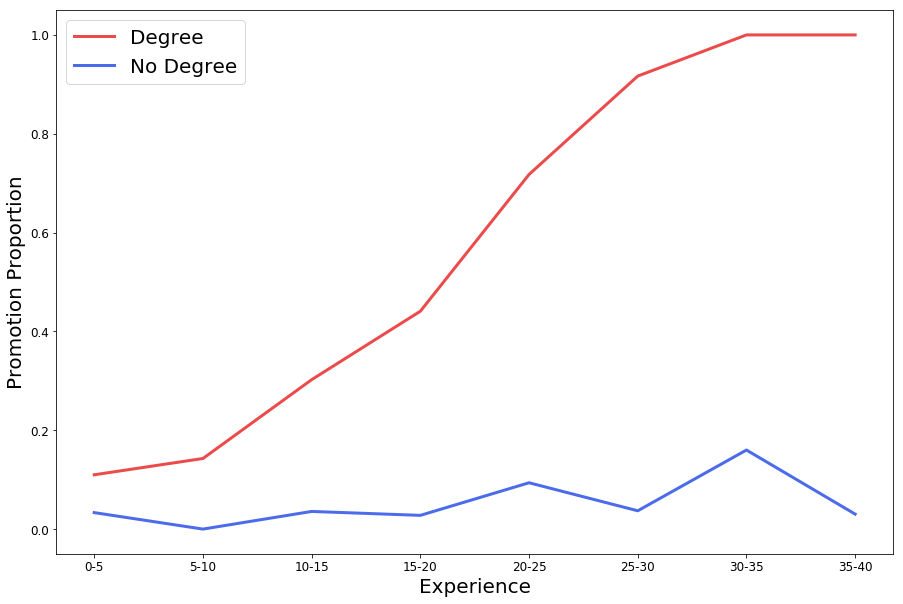

In [278]:
#Relationship with promotion
df = data.copy(deep=True)
df['experience'] = [math.floor(x/5)*5 for x in data_original['experience']]
exp = range(0,40,5)
deg_0 = []
deg_1 = []
for i in exp:
    df_0 = df[(df.experience == i) & (df.degree==0)]
    df_1 = df[(df.experience == i) & (df.degree==1)]
    
    prop_0 = sum(df_0.promotion)/len(df_0)
    prop_1 = sum(df_1.promotion)/len(df_1)
    
    deg_0.append(prop_0)
    deg_1.append(prop_1)

plt.subplots(nrows=1, ncols=1,figsize=(15,10))

plt.plot(exp,deg_1,c=color[0],lw=3, label='Degree')
plt.plot(exp,deg_0,c=color[6],lw=3, label='No Degree')

plt.ylabel("Promotion Proportion",size=20)
plt.xlabel('Experience',size=20)
plt.yticks(size=12)
labels = ["{}-{}".format(e,e+5) for e in exp]
plt.xticks(exp,labels, size=12)


plt.legend(loc =2,prop={"size":20})

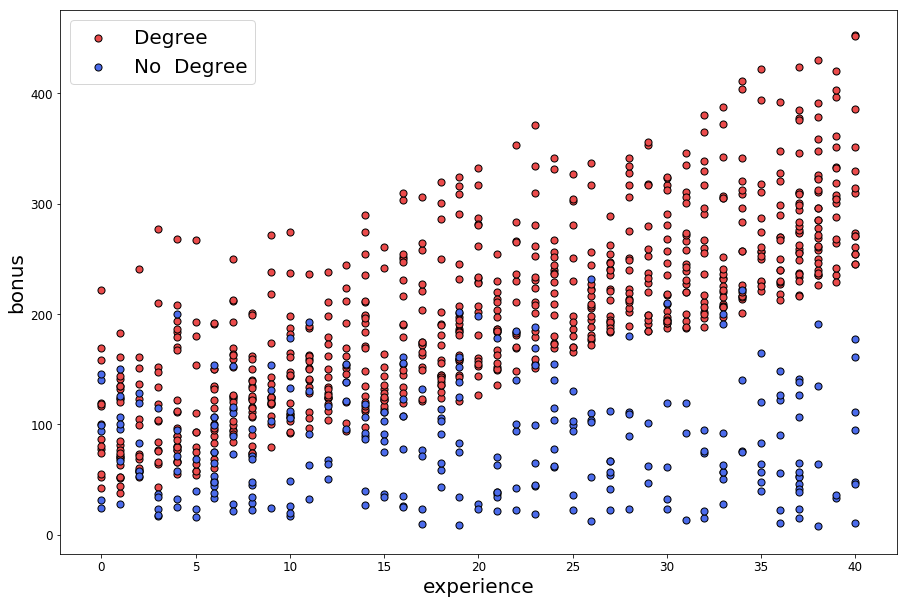

In [198]:
#Relationship with bonus
data_original = data.copy(deep=True)

plt.subplots(nrows=1, ncols=1,figsize=(15,10))
plt.scatter('experience','bonus',c=color[0],s=50,edgecolors='#000000',data=data_original[data_original.degree == 1])
plt.scatter('experience','bonus',c=color[6],s=50,edgecolors='#000000',data=data_original[data_original.degree == 0])
plt.ylabel("bonus",size=20)
plt.xlabel('experience',size=20)
plt.yticks(size=12)
plt.xticks(size=12)

plt.legend(['Degree','No  Degree'],loc =2,prop={"size":20})

In [282]:
#Relationship with promotion
df = data.copy(deep=True)
df['sales'] = [math.floor(x/10)*10 for x in df['sales']]
df['performance'] = [math.floor(x/2)*2 for x in df['performance']]
df.head()

,experience,degree,performance,sales,bonus,promotion
0,34,1,4,60,309,1
1,2,1,6,30,105,0
2,0,1,6,80,169,0
3,3,1,2,80,103,0
4,40,1,2,30,273,1


In [283]:
sales = range(0,100,10)

def promotion_prop(perf=0): 
    
    prop = []
    for i in sales:
        
        df_i = df[(df.sales ==i) & (df.performance == perf)]
        p = 0
        if len(df_i) != 0: 
            p = sum(df_i.promotion)/len(df_i)
        
        prop.append(p) 
        
    return prop
promotion_prop(8)

[0.3333333333333333,
 0.5,
 0.5625,
 0.3333333333333333,
 0.46153846153846156,
 0.55,
 0.6190476190476191,
 0.7142857142857143,
 1.0,
 1.0]

([<matplotlib.axis.XTick at 0x7fcf4eb17da0>,
 <a list of 10 Text xticklabel objects>)

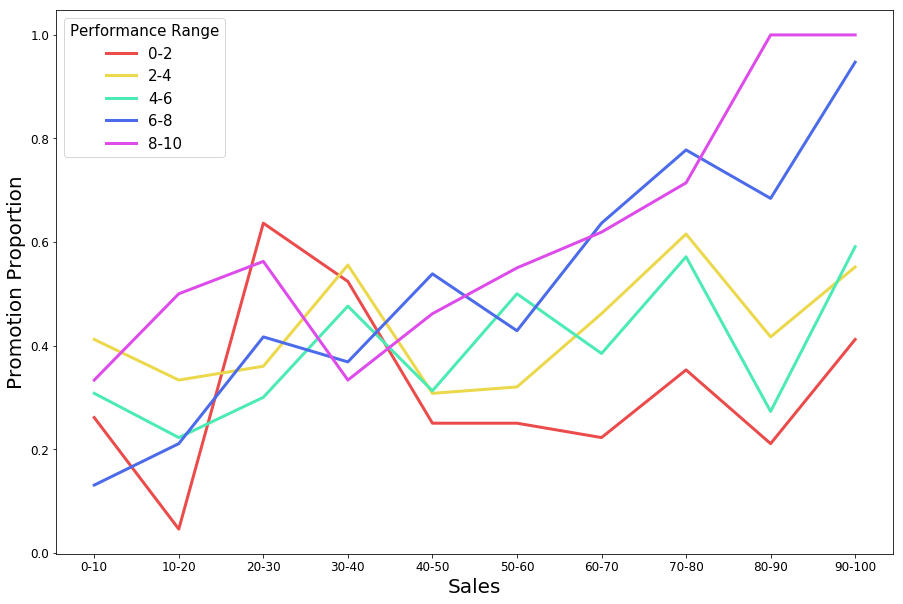

In [294]:
plt.subplots(nrows=1, ncols=1,figsize=(15,10))
for i in range(0,10,2):
    plt.plot(sales,promotion_prop(i),c=color[i],lw=3,label="{}-{}".format(i,i+2))
leg = plt.legend(title = "Performance Range", loc =2,prop={"size":15},fontsize=20)
plt.setp(leg.get_title(),fontsize=15)
plt.ylabel("Promotion Proportion",size=20)
plt.xlabel('Sales',size=20)
plt.yticks(size=12)
labels = ["{}-{}".format(s,s+10) for s in sales]
plt.xticks(sales,labels, size=12)

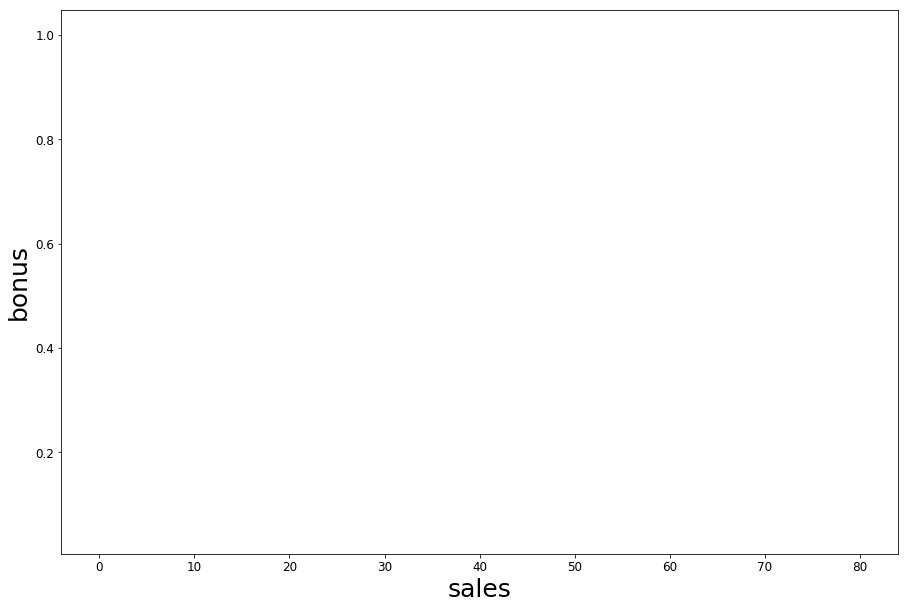

In [270]:
fig = plt.figure(figsize=(15,10))

camera = Camera(fig)
for i in range(10):
    plt.plot(sales,promotion_prop(i),c=color[i],lw=3,label=i)
    plt.ylabel("bonus",size=25)
    plt.xlabel('sales',size=25)
    #plt.title("Performance range: {}-{}".format(i,i+1),size=30)
    leg = plt.legend(labels=["Performance: {}-{}".format(i,i+1)],loc=2,fontsize = 30,frameon=False)
    leg.legendHandles[0].set_color(color[i])
    plt.yticks(size=12)
    plt.xticks(size=12)
    camera.snap()
a = camera.animate()

a.save("../figures/promotion_interaction.gif", writer='pillow', fps=2,dpi=150)

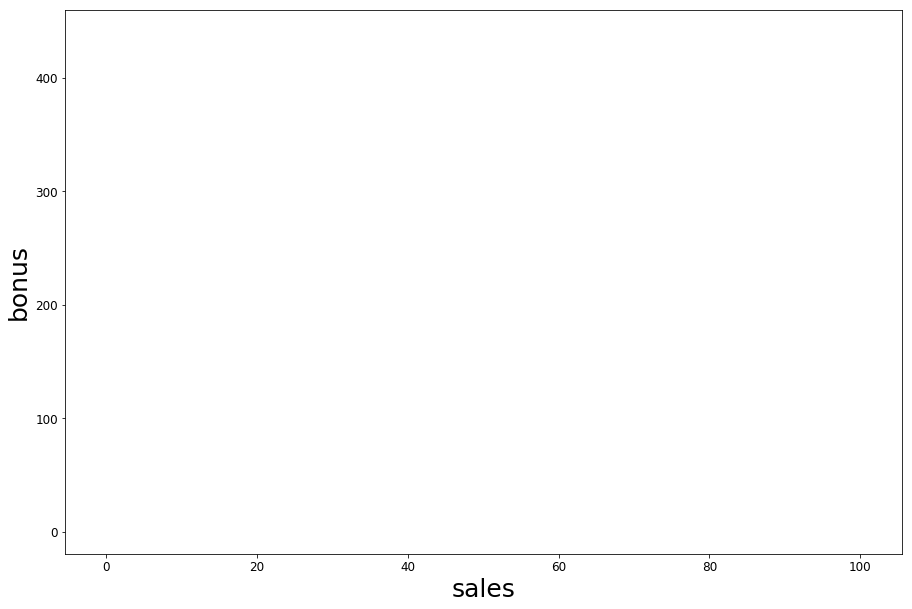

In [133]:
import numpy as np
from celluloid import Camera
import matplotlib.pyplot as plt


color = ['#eb4b4b','#eba64b','#ebd84b','#9beb4b','#4bebb3','#4bc0eb','#4b6beb','#a64beb','#de4beb','#eb4b8b']

data_original = data.copy(deep=True)
data_original['perf'] = [math.floor(x) for x in data_original['performance']]
data_original.head()


fig = plt.figure(figsize=(15,10))

camera = Camera(fig)
for i in range(10):
    p = plt.scatter('sales','bonus',c=color[i],s=50,edgecolors='#000000',data=data_original[data_original.perf==i])
    plt.ylabel("bonus",size=25)
    plt.xlabel('sales',size=25)
    #plt.title("Performance range: {}-{}".format(i,i+1),size=30)
    leg = plt.legend(labels=["Performance: {}-{}".format(i,i+1)],loc=2,fontsize = 30,frameon=False)
    leg.legendHandles[0].set_color(color[i])
    plt.yticks(size=12)
    plt.xticks(size=12)
    camera.snap()
a = camera.animate()

a.save("../figures/out.gif", writer='pillow', fps=2,dpi=150)


## Random Forest - Promotion

In [302]:
X = data[['experience', 'degree', 'performance', 'sales']]
y = data['promotion']

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 101)
# Fitting the model
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(x_train, y_train)

# Prediction and evaluation
train_preds = rfc.predict(x_train)
test_preds = rfc.predict(x_test)

# Accuracy
train_accuracy = accuracy_score(y_train,train_preds)
test_accuracy = accuracy_score(y_test,test_preds)
print("Train:{} Test:{}".format(round(train_accuracy*100,2),round(test_accuracy*100,2)))

# Prediction and evaluation
print(classification_report(y_test,test_preds))

# Create confusion matrix
print(confusion_matrix(y_test,test_preds))

Train:100.0 Test:95.33
             precision    recall  f1-score   support

          0       0.94      0.97      0.95       152
          1       0.97      0.93      0.95       148

avg / total       0.95      0.95      0.95       300

[[148   4]
 [ 10 138]]


In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor

print("Training HistGradientBoostingRegressor...")
tic = time()
est = HistGradientBoostingRegressor()
est.fit(X_train, y_train)
print(f"done in {time() - tic:.3f}s")
print(f"Test R2 score: {est.score(X_test, y_test):.2f}")

In [ ]:
print('Computing partial dependence plots...')
tic = time()
display = plot_partial_dependence(
    est, X_train, features, kind="both", subsample=50,
    n_jobs=3, grid_resolution=20, random_state=0
)
print(f"done in {time() - tic:.3f}s")
display.figure_.suptitle(
    'Partial dependence of house value on non-location features\n'
    'for the California housing dataset, with Gradient Boosting'
)
display.figure_.subplots_adjust(wspace=0.4, hspace=0.3)

# Cover Image

In [ ]:
[3,4,5,6,7,8,9,10,1,2] [3,2,1,2,3,4,5,6,7,8,9,10,9,8,7,6,5,4]        10,9,8,7,6,5,4,3,4,5,6,7,8,9,10,1,2]

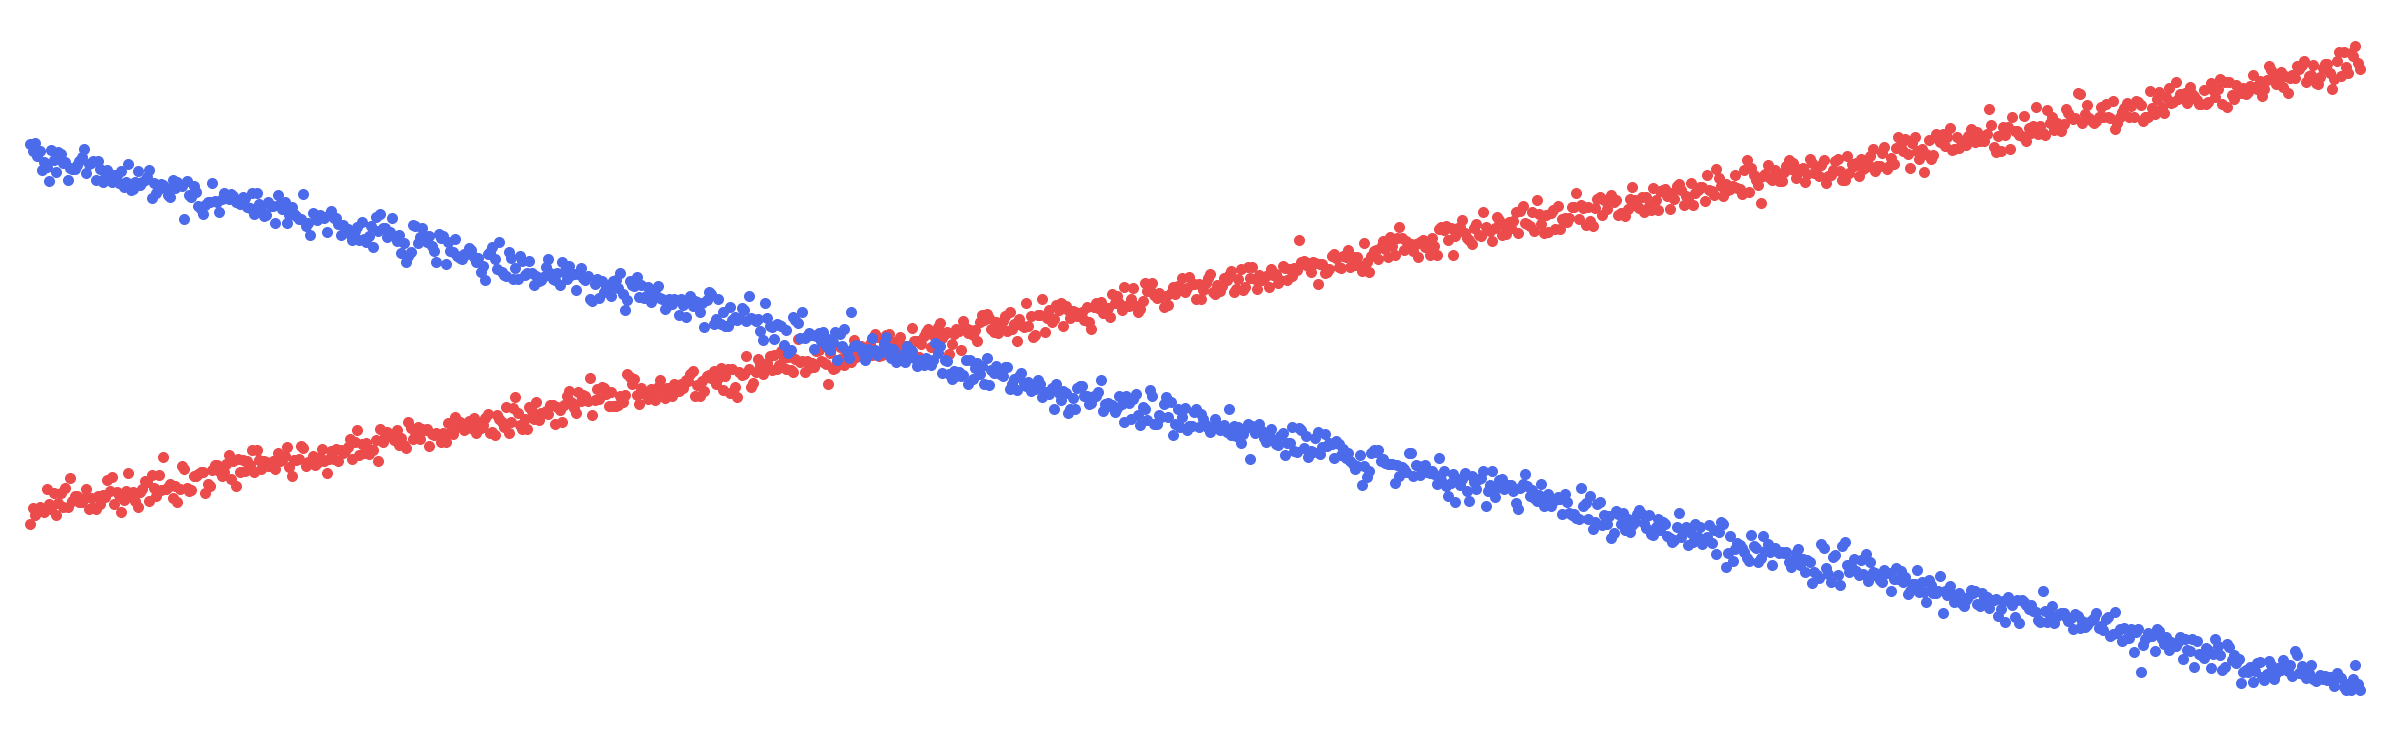

In [166]:
x = np.linspace(0,1,1000)

i = 4

x = np.linspace(0,1,1000)



fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(33,10))
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
x = np.linspace(0,1,1000)
y1 = (1/2)*x -i/10 + np.random.randn(1000)*0.01 
y2 = -((10-i)/10)*x+ np.random.randn(1000)*0.01 
plt.scatter(x,y1,c=color[0],s= 100)
plt.scatter(x,y2,c=color[6],s= 100)

# Hide grid lines
ax.grid(False)

# Hide axes ticks
plt.xlim(-0.01, 1.01) 
ax.set_xticks([])
ax.set_yticks([])
plt.axis('off')
plt.savefig("../figures/rf_cover.png")

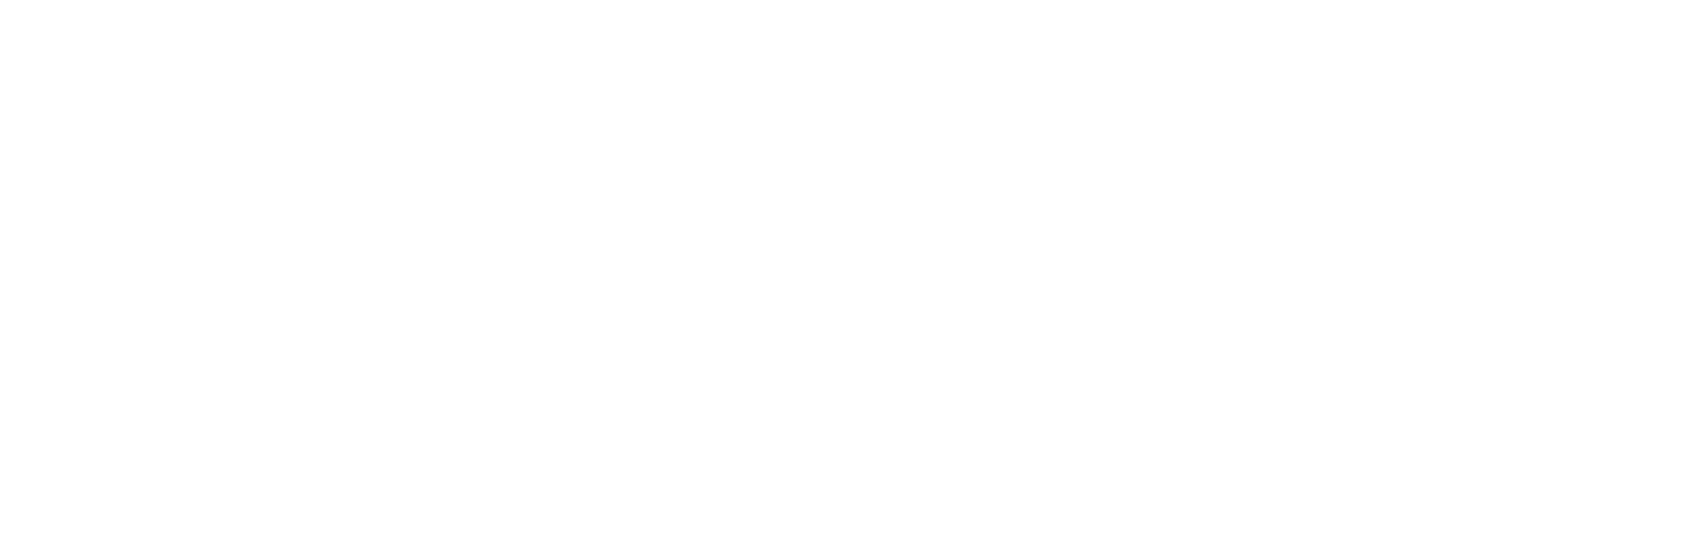

In [174]:
import numpy as np
from celluloid import Camera
import matplotlib.pyplot as plt


color = ['#eb4b4b','#eba64b','#ebd84b','#9beb4b','#4bebb3','#4bc0eb','#4b6beb','#a64beb','#de4beb','#eb4b8b']
fig = plt.figure(figsize=(23,7))
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
camera = Camera(fig)
for i in [3,2,1,2,3,4,5,6,7,8,9,10,9,8,7,6,5,4]:
    x = np.linspace(0,1,1000)
    y1 = (1/2)*x -i/10 + np.random.randn(1000)*0.1 
    y2 = -((10-i)/10)*x+ np.random.randn(1000)*0.1 
    plt.scatter(x,y1,c=color[0],s= 100)
    plt.scatter(x,y2,c=color[6],s= 100)
    ax.grid(False)
    plt.xlim(-0.01, 1.01) 
    ax.set_xticks([])
    ax.set_yticks([])
    plt.axis('off')
    
    camera.snap()
a = camera.animate()

a.save("../figures/rf_cover.gif",writer='pillow', fps=2,dpi=10)

# Archive

In [ ]:
data_original = data.copy(deep=True)

plt.subplots(nrows=1, ncols=1,figsize=(15,10))
plt.scatter('performance','bonus',c='#ff2121',s=50,edgecolors='#000000',data=data_original)
plt.ylabel("bonus",size=20)
plt.xlabel('performance',size=20)
plt.yticks(size=12)
plt.xticks(size=12)